In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('universal_datasets/bananas.csv')

In [3]:
df

,length,width,category
0,192.317753,42.110076,0
1,237.741085,36.202435,1
2,191.600459,43.469408,0
3,234.870183,40.066143,1
4,228.329581,37.363579,1
...,...,...,...
95,208.929664,47.229380,0
96,207.658093,44.467789,0
97,216.512791,24.429459,1
98,195.172279,44.597779,0


In [5]:
X = df[['length','width']]
y = df['category']

In [6]:
X[:5]

,length,width
0,192.317753,42.110076
1,237.741085,36.202435
2,191.600459,43.469408
3,234.870183,40.066143
4,228.329581,37.363579


In [7]:
y[:5]

0    0
1    1
2    0
3    1
4    1
Name: category, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
for item in X_train, X_test, y_train, y_test:
    print(item[:2])        # Let's look at just two samples
    print(item.shape)      # Let's confirm the number of samples
    print()

        length      width
28  231.568879  32.733688
93  190.142527  45.764529
(67, 2)

        length      width
83  187.600405  36.487954
53  229.763182  33.942771
(33, 2)

28    1
93    0
Name: category, dtype: int64
(67,)

83    0
53    1
Name: category, dtype: int64
(33,)



Text(0.5, 1.0, "'Cavendish' vs. 'Apple Banana' Training Data")

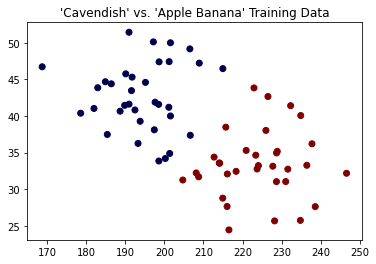

In [11]:
plt.scatter(X_train['length'], X_train['width'], c=y_train,
            cmap='seismic')
plt.title("'Cavendish' vs. 'Apple Banana' Training Data")
# Blue is cat zero, red is cat one

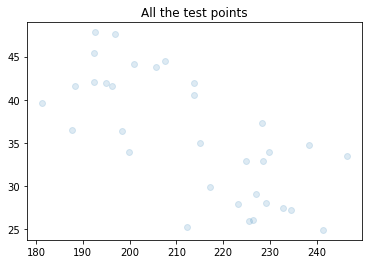

In [12]:
plt.title("All the test points")
plt.scatter(X_test['length'], X_test['width'], alpha=0.15)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
model = GaussianNB()

In [15]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [18]:
y_pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [19]:
y_pred.shape

(33,)

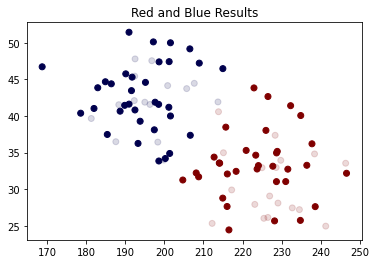

In [22]:
plt.title('Red and Blue Results')

plt.scatter(X_train['length'], X_train['width'], c=y_train, cmap='seismic')
plt.scatter(X_test['length'], X_test['width'], c=y_pred,cmap='seismic',alpha=0.15)

In [26]:
model.score(X,y)

0.99

In [27]:
y_pred_single = model.predict([[187,36]])
y_pred_single

array([0], dtype=int64)

In [28]:
y_pred_pair = model.predict([[232,33],[190,46]])
y_pred_pair

array([1, 0], dtype=int64)